In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_curve, roc_auc_score, confusion_matrix, accuracy_score, f1_score, precision_recall_curve) 
from sklearn.datasets import make_classification

In [2]:
features, output = make_classification(n_samples = 500, n_features = 10, n_informative = 6, n_redundant = 4, n_classes = 2, random_state = 2022)
X = pd.DataFrame(features, columns=["feature_1", "feature_2", "feature_3", "feature_4", "feature_5", "feature_6", "feature_7", "feature_8", "feature_9", "feature_10"])
y = output

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.model_selection import RepeatedKFold 
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import math

C:\Users\jsh98\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\jsh98\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
No artists with labels found to put in lege

C:\Users\jsh98\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\jsh98\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
No artists with labels found to put in lege

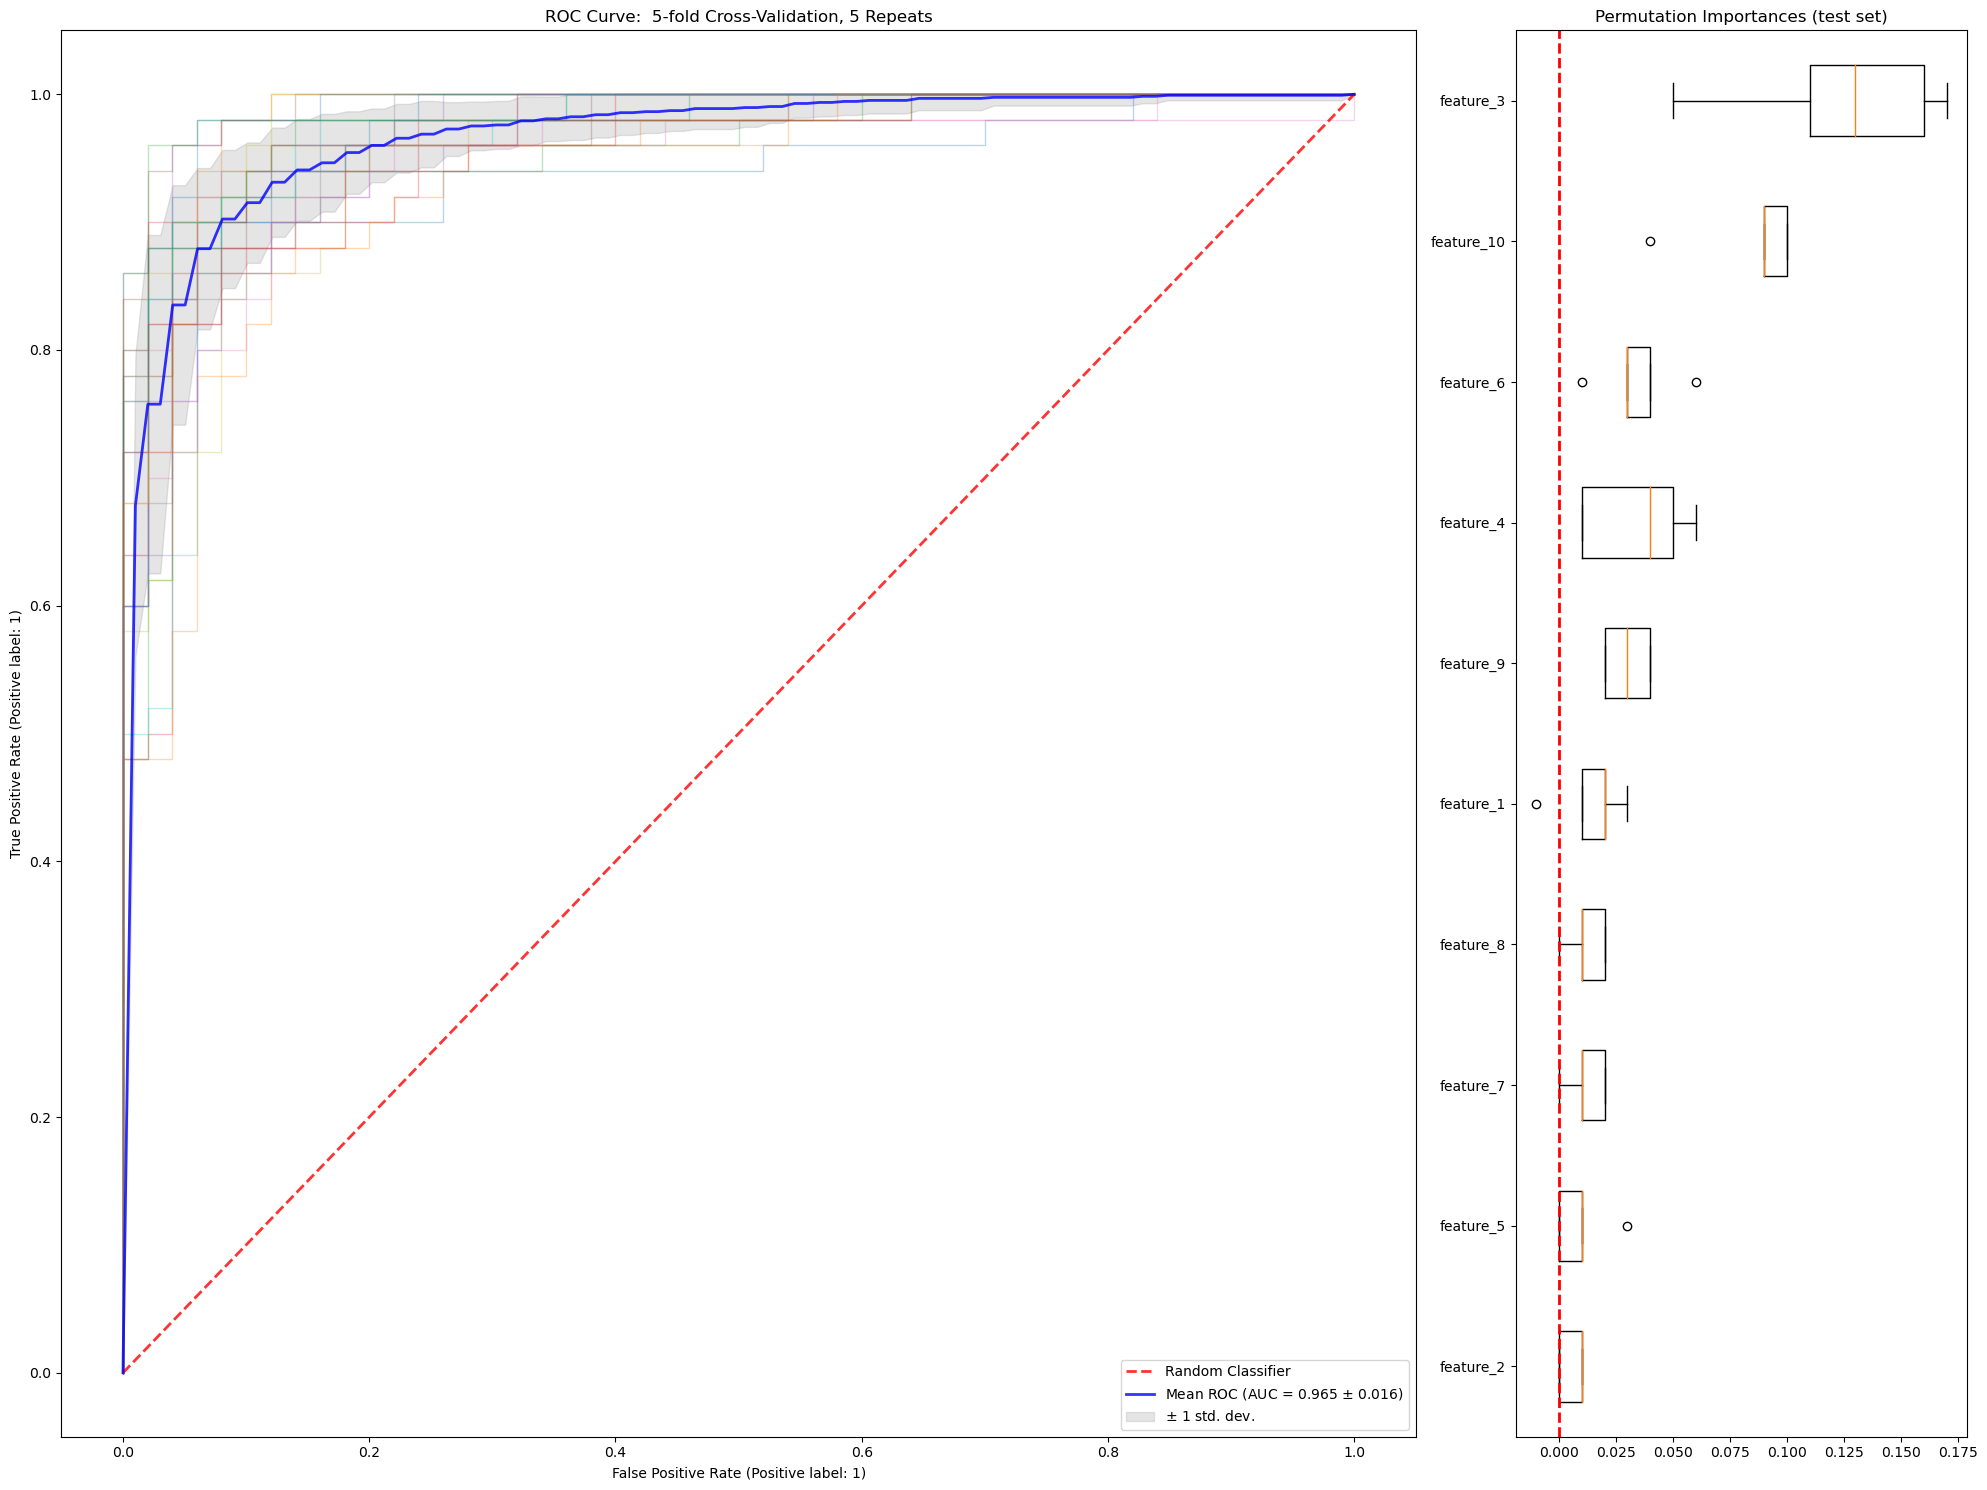

In [4]:
n_splits = 5
n_repeats = 5

feature_names = X.columns
features = list(X.columns)
features_pd = pd.DataFrame (features, columns = ['feature'])


    #
classifier =  XGBClassifier()

    #cv = StratifiedKFold(n_splits=5)
cv = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats = n_repeats, random_state=42)

tprs = []
aucs = []

    # 100 evenly spaced points from 0 to 1
mean_fpr = np.linspace(0, 1, 100)

fig, (ax, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(20, 15))

    # Plot the individual ROC curves from the split
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X.iloc[train, :], y[train])
    y_pred = classifier.predict_proba(X.iloc[test, :])

    result_pre = permutation_importance(classifier, X.iloc[test, :], y[test], random_state=0)
    result = result_pre.importances_mean
    importances = pd.DataFrame(result, index = features, columns=[('importance' + str(i))])

    features_pd = features_pd.join(importances, 'feature', 'inner')

    viz = plot_roc_curve(classifier, X.iloc[test, :], y[test],
                            name='ROC fold {}'.format(i),
                            label ='_nolegend_',
                            alpha=0.3, lw=1, ax=ax)
        
        # Interpolate the calculated TPR at the evenly spaced points, given the calculated TPR and FPR
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

    # Plot the random classifier line
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Random Classifier', alpha=.8)

    # Calculate and plot the mean of all the ROC curves from the splits
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

    # Standard Error = Standard Deviation / SQRT(n)
std_err_auc = std_auc / (math.sqrt(len(aucs)))

    # 95% confidence interval = 1.96 * std_err
confidence_interval = 1.96 * std_err_auc

ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    # Plot standard deviation of ROC curves, and fill the space
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
        title= 'ROC Curve:  {}-fold Cross-Validation, {} Repeats'.format(n_splits, n_repeats) )
ax.legend(loc="lower right")

    #set_output_image_type('svg')
plt.rcParams['svg.fonttype'] = 'none'

    # adds box and whisker feature importance plot
lw = 2
sorted_idx1 = result_pre.importances_mean.argsort()

ax2.boxplot(
    result_pre.importances[sorted_idx1].T, vert=False, labels=feature_names[sorted_idx1]
    )
ax2.axvline(0, color='red', lw=lw, linestyle='--')
ax2.set_title("Permutation Importances (test set)")
    
fig.tight_layout()
plt.show()    



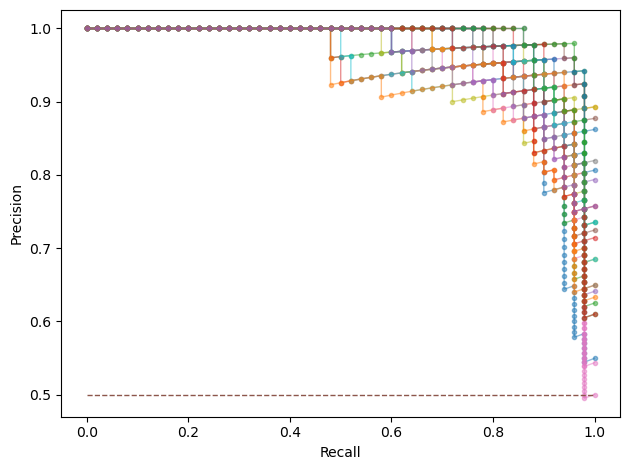

In [7]:
f = []
pre = []
rec = []

    # Plot the individual ROC curves from the split
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X.iloc[train, :], y[train])
    y_pred = classifier.predict_proba(X.iloc[test, :])
    y_pred = y_pred[:, 1]
    yhat = classifier.predict(X.iloc[test, :])

    precision, recall, threshold = precision_recall_curve(y[test], y_pred)
        #auc = auc(recall, precision)
    f1 = f1_score(y[test], yhat, average = 'micro')
    f.append(f1)
    pre.append(precision)
    rec.append(recall)
    plt.plot(recall, precision, marker='.', label='XGBoost', linewidth = 1, alpha = 0.5)

no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill', linewidth = 1)
    


     

    # Plot the random classifier line
   

    # adds box and whisker feature importance plot
lw = 2
    
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.tight_layout()
plt.show()